# PCA (Core) / Elida Peña
**Reducción de Dimensionalidad** 

**Descripción:**

En esta actividad, aplicarás el Análisis de Componentes Principales (PCA) para reducir la dimensionalidad de un conjunto de datos grande. Utilizaremos el dataset «Wine Quality» disponible en Kaggle, que contiene variables químicas que influyen en la calidad del vino. PCA te permitirá reducir el número de características sin perder mucha información.

Enlace al dataset: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009



**Objetivo:**

El objetivo principal es utilizar PCA para reducir la dimensionalidad del dataset, identificar los componentes principales, y analizar cómo contribuyen a la variabilidad de los datos. Esto facilitará la comprensión del conjunto de datos y permitirá crear modelos más eficientes.



**Instrucciones:**

1. Carga de datos:
  – Descarga y carga el dataset «Wine Quality» de Kaggle. Examina el contenido del dataset y verifica las variables químicas que afectan la calidad del vino.
  – El dataset contiene 12 variables como el nivel de acidez, el pH, el contenido de alcohol, entre otras.

2. Exploración y preprocesamiento de datos:
  – Realiza una exploración inicial del dataset. Revisa los valores nulos, los rangos de las variables y cualquier valor atípico que pueda afectar el rendimiento de PCA.
  – Normaliza las variables, ya que PCA es sensible a las escalas de las características. Esto asegura que las variables tengan una contribución equitativa en la formación de los componentes principales.

3. Aplicación de PCA:
  – Implementa PCA en el dataset para reducir la dimensionalidad. Determina cuántos componentes principales se necesitan para capturar al menos el 90% de la variabilidad de los datos.
  – Visualiza el gráfico de «explained variance» para mostrar cómo cada componente principal contribuye a la variabilidad total de los datos.

4. Interpretación de los componentes principales:
  – Analiza los coeficientes de cada componente principal para identificar qué variables tienen la mayor influencia en cada uno de ellos.
  – Discute cómo la reducción de dimensionalidad mediante PCA puede simplificar la construcción de modelos predictivos al eliminar redundancia en las características.

5. Visualización y comparación:
  – Visualiza los datos proyectados en los primeros dos componentes principales utilizando un gráfico de dispersión.
  – Si el dataset tiene etiquetas de clase (como la calidad del vino), observa cómo se distribuyen las clases en el espacio de los componentes principales.



**Análisis de Resultados:**

  – Realiza un análisis detallado sobre cuántos componentes principales son necesarios para capturar una cantidad significativa de variabilidad. Discute la importancia de las variables que más contribuyen a los primeros componentes.
  – Explica cómo PCA puede ser útil para mejorar el rendimiento de los modelos de machine learning en datasets con muchas características.



**Conclusión:**

  – Esta actividad tiene como objetivo principal aplicar PCA para la reducción de dimensionalidad en un dataset real. Al reducir la dimensionalidad, PCA facilita la creación de modelos más interpretables y eficientes.

In [4]:
# Paso 1: Importación de librerías necesarias
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [1]:

# Ruta del dataset
ruta_dataset = "../data/winequality-red.csv"
df = pd.read_csv(ruta_dataset)

# Vista inicial del dataset
print("Primeras filas del dataset:")
print(df.head())

# Información general sobre el dataset
print("\nInformación del dataset:")
print(df.info())

# Resumen estadístico
print("\nResumen estadístico del dataset:")
print(df.describe())

Primeras filas del dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8    

In [2]:
# Paso 2: Exploración y Preprocesamiento

# Verificar si hay valores nulos en el dataset
print("¿Hay valores nulos en el dataset?")
print(df.isnull().sum())

¿Hay valores nulos en el dataset?
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [3]:
# Revisar los rangos de las variables para detectar posibles valores atípicos
print("\nRangos de las variables:")
print(df.describe())

# Normalización de las variables (usando StandardScaler para escalarlas)
from sklearn.preprocessing import StandardScaler

# Separar las características y la etiqueta (si la etiqueta es la columna 'quality')
X = df.drop(columns=['quality'])  # Sustituye 'quality' por la etiqueta adecuada si es diferente
y = df['quality']

# Normalizar las características
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

print("\nDatos normalizados (primeras 5 filas):")
print(pd.DataFrame(X_normalized, columns=X.columns).head())


Rangos de las variables:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000    


Varianza explicada por cada componente principal:
Componente 1: 0.2817
Componente 2: 0.1751
Componente 3: 0.1410
Componente 4: 0.1103
Componente 5: 0.0872
Componente 6: 0.0600
Componente 7: 0.0531
Componente 8: 0.0385
Componente 9: 0.0313
Componente 10: 0.0165
Componente 11: 0.0054

Número de componentes principales necesarios para capturar al menos el 90% de la varianza: 7


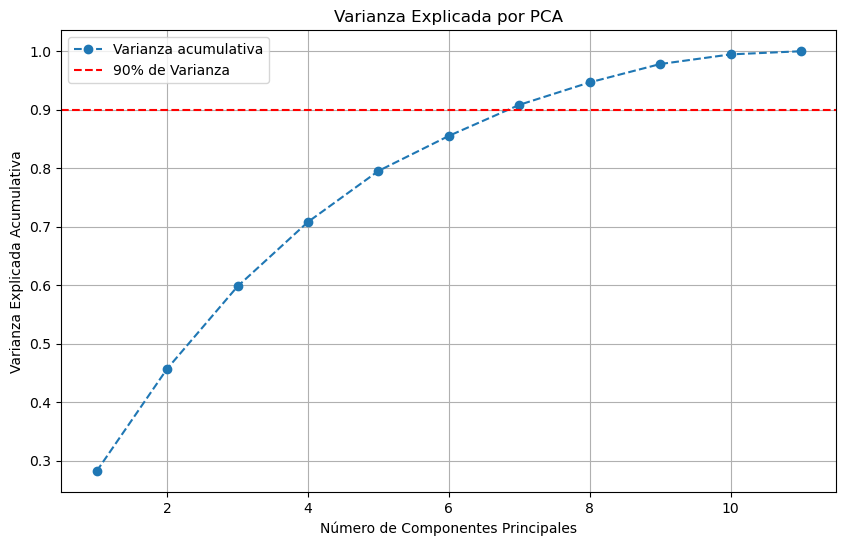

In [5]:
# Inicializamos PCA
pca = PCA()

# Aplicamos PCA a los datos normalizados
X_pca = pca.fit_transform(X_normalized)

# Varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_

# Varianza explicada acumulativa
cumulative_variance = np.cumsum(explained_variance)

# Imprimir cuánta varianza explica cada componente principal
print("\nVarianza explicada por cada componente principal:")
for i, var in enumerate(explained_variance):
    print(f"Componente {i+1}: {var:.4f}")

# Determinar el número de componentes necesarios para capturar al menos el 90% de la varianza
num_components = np.argmax(cumulative_variance >= 0.90) + 1
print(f"\nNúmero de componentes principales necesarios para capturar al menos el 90% de la varianza: {num_components}")

# Gráfico de varianza explicada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', label='Varianza acumulativa')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% de Varianza')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulativa')
plt.title('Varianza Explicada por PCA')
plt.legend()
plt.grid()
plt.show()

In [6]:
# Paso 4: Interpretación de los Componentes Principales

# Obtener los coeficientes (o pesos) de las variables originales para cada componente principal
componentes = pd.DataFrame(
    pca.components_,
    columns=X.columns,
    index=[f'Componente {i+1}' for i in range(len(pca.components_))]
)

# Mostrar los coeficientes de los primeros componentes principales
print("\nContribución de las variables a los primeros componentes principales:")
print(componentes.head())

# Identificar las variables más influyentes en el primer componente principal
print("\nVariables más influyentes en el Componente 1 (ordenadas por contribución):")
print(componentes.loc['Componente 1'].sort_values(ascending=False))

# Si quieres analizar más de un componente, cambia el índice de la línea anterior, por ejemplo, a 'Componente 2'.



Contribución de las variables a los primeros componentes principales:
              fixed acidity  volatile acidity  citric acid  residual sugar  \
Componente 1       0.489314         -0.238584     0.463632        0.146107   
Componente 2      -0.110503          0.274930    -0.151791        0.272080   
Componente 3      -0.123302         -0.449963     0.238247        0.101283   
Componente 4      -0.229617          0.078960    -0.079418       -0.372793   
Componente 5      -0.082614          0.218735    -0.058573        0.732144   

              chlorides  free sulfur dioxide  total sulfur dioxide   density  \
Componente 1   0.212247            -0.036158              0.023575  0.395353   
Componente 2   0.148052             0.513567              0.569487  0.233575   
Componente 3  -0.092614             0.428793              0.322415 -0.338871   
Componente 4   0.666195            -0.043538             -0.034577 -0.174500   
Componente 5   0.246501            -0.159152             -0.

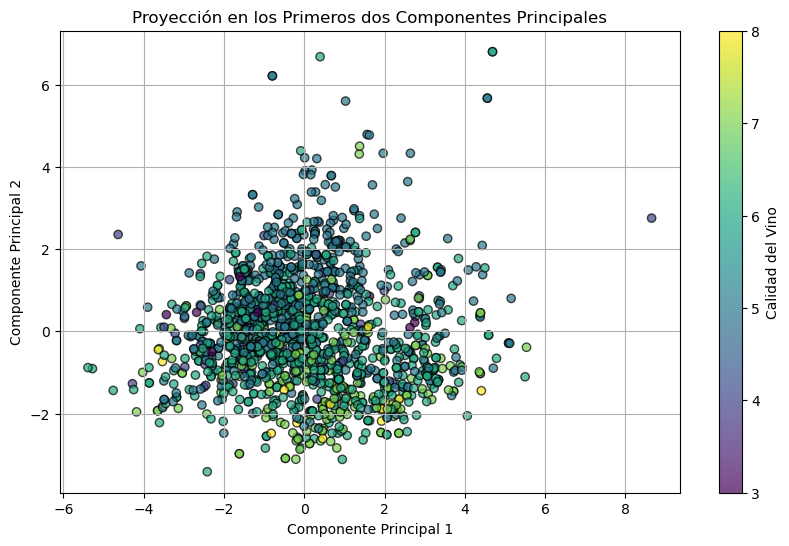

In [7]:
# Paso 5: Visualización en los primeros dos componentes principales
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.7)
plt.colorbar(label='Calidad del Vino')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Proyección en los Primeros dos Componentes Principales')
plt.grid()
plt.show()
